In [33]:
import os, cv2
import pandas as pd
import numpy as np
import seaborn as sns
import random
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, cross_val_predict
from sklearn import metrics
from sklearn import dummy
from sklearn.cluster import KMeans
import xgboost as xgb
from sklearn.preprocessing import StandardScaler

ROWS = 64
COLS = 64
CHANNELS = 3

### Preparing the data:

In [13]:
train_path = r'C:\Users\meirk\Desktop\train\train/'
labels = pd.read_csv(r'C:\Users\meirk\Desktop\Ariel\semester B 1st year\labels.csv')
train_images = [train_path + i for i in os.listdir(train_path)]

In [14]:
labels_df = labels.drop(['Unnamed: 0'],axis = 1)
labels_df

,id,label
0,1,1.0
1,1,1.0
2,1,1.0
3,1,1.0
4,0,0.0
...,...,...
12495,0,0.0
12496,0,0.0
12497,1,1.0
12498,1,1.0


In [15]:
labels_df = labels_df.drop(['label'], axis = 1)

In [16]:
labels_df

,id
0,1
1,1
2,1
3,1
4,0
...,...
12495,0
12496,0
12497,1
12498,1


In [17]:
def read_image(file_path):
    img = cv2.imread(file_path, cv2.IMREAD_COLOR)
    return cv2.resize(img, (ROWS, COLS))

In [18]:
def prep_data(images):
    m = len(images)
    n_x = ROWS * COLS * CHANNELS
    X = np.ndarray((m, n_x), dtype=np.uint8)
    y = np.zeros((m, 1))

    for i, image_file in enumerate(images):
        image = read_image(image_file)
       # image = plt.imread(image_file, 0)
        X[i, :] = np.squeeze(image.reshape((n_x, 1)))
        if '/dog' in image_file:
            y[i, 0] = 1
        elif '/cat' in image_file:
             y[i, 0] = 0
        
    return X, y

In [19]:
X, y = prep_data(train_images)

In [20]:
data = pd.DataFrame(X)
data

,0,1,2,3,4,5,6,7,8,9,...,12278,12279,12280,12281,12282,12283,12284,12285,12286,12287
0,90,167,206,96,173,212,101,179,222,106,...,2,0,2,2,0,2,2,0,2,2
1,43,44,40,49,42,39,38,37,33,31,...,66,63,67,85,59,63,81,19,26,38
2,54,45,40,59,45,41,58,47,42,68,...,155,4,167,174,4,192,193,9,175,180
3,217,222,220,218,223,222,230,231,231,230,...,205,220,221,217,211,214,214,208,212,216
4,73,110,138,81,118,146,43,81,110,47,...,111,77,105,117,65,94,104,62,86,98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,107,144,148,108,145,149,111,148,152,113,...,178,134,169,179,134,169,179,135,170,180
24996,56,84,114,54,81,107,55,80,104,64,...,98,55,84,105,80,111,132,40,65,87
24997,34,37,43,44,47,53,45,46,48,36,...,122,164,206,243,96,133,157,118,162,205
24998,254,254,254,243,242,254,212,218,254,168,...,105,116,113,136,114,111,127,113,113,129


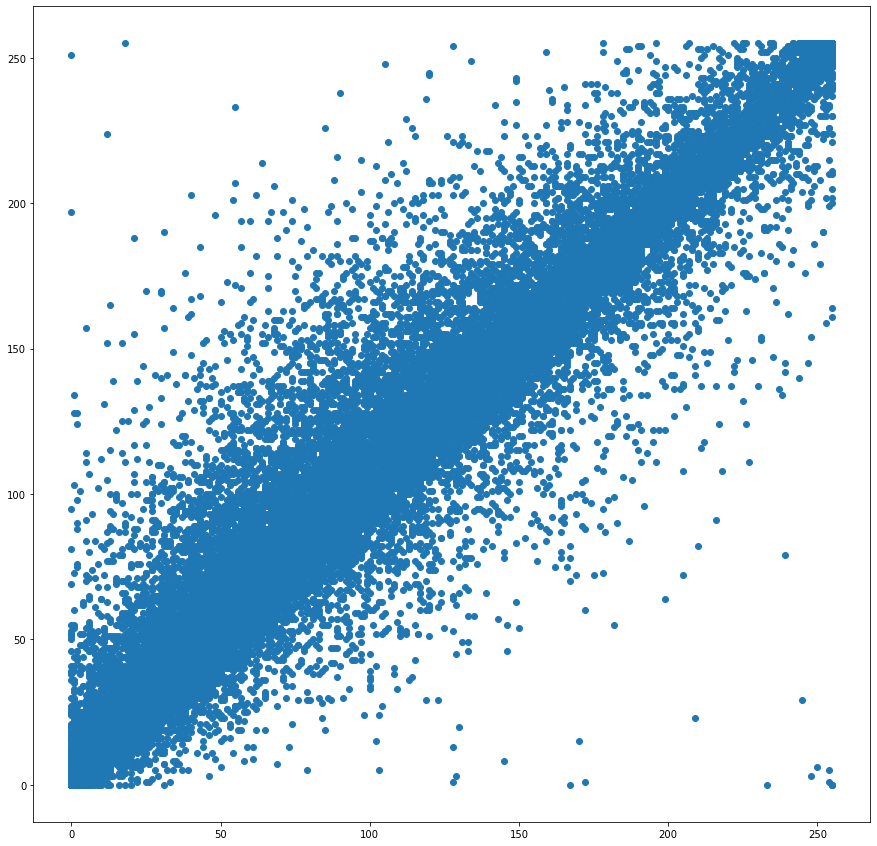

In [40]:
plt.figure(figsize=(15, 15))
plt.scatter(data.iloc[:, 0], data.iloc[:, 1])

### Looking on some pictures:

In [26]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(X) 

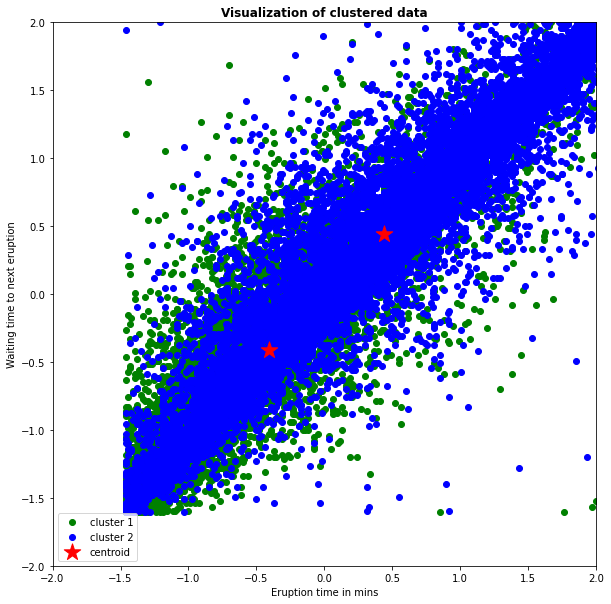

In [41]:
#applying k_means on data
km = KMeans(n_clusters=2, max_iter=100)
km.fit(data_scaled)
centroids = km.cluster_centers_

# Plot the clustered data
fig, ax = plt.subplots(figsize=(10, 10))
plt.scatter(data_scaled[km.labels_ == 0, 0], data_scaled[km.labels_ == 0, 1],
            c='green', label='cluster 1')
plt.scatter(data_scaled[km.labels_ == 1, 0], data_scaled[km.labels_ == 1, 1],
            c='blue', label='cluster 2')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=300,
            c='r', label='centroid')
plt.legend()
plt.xlim([-2, 2])
plt.ylim([-2, 2])
plt.xlabel('Eruption time in mins')
plt.ylabel('Waiting time to next eruption')
plt.title('Visualization of clustered data', fontweight='bold')
ax.set_aspect('equal');

In [13]:
#for i, image_file in enumerate(X):
 #   image = cv2.imread(image_file,0)

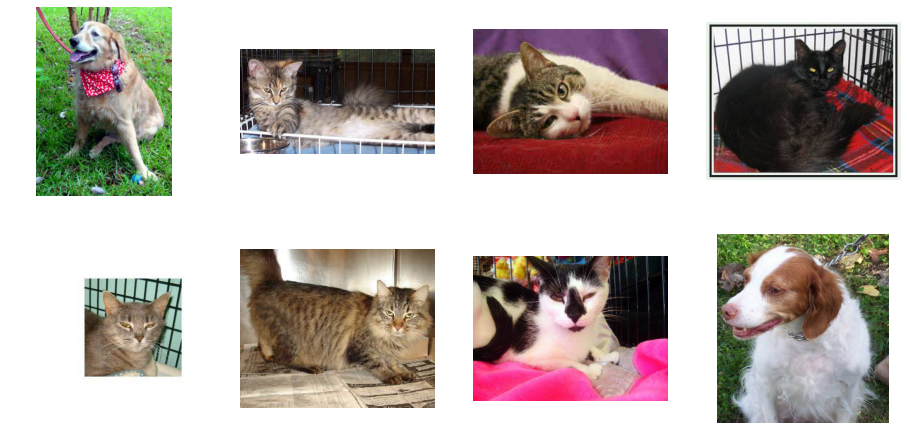

In [14]:
plt.figure(figsize=(16,16))

images = os.listdir(r'C:\Users\meirk\Desktop\train\train/')
for i in range(8):
    img = random.choice([x for x in images])
    fig = plt.subplot(4,4,i+1)
    fig.axis('off')
    img = mpimg.imread(os.path.join(r'C:\Users\meirk\Desktop\train\train/', img)) 
    fig.imshow(img) 

### How many samples from each label:

In [15]:
y_df = pd.DataFrame(data=y,columns=['label'])
x_df = pd.DataFrame(data=X)

0.0    12500
1.0    12500
Name: label, dtype: int64


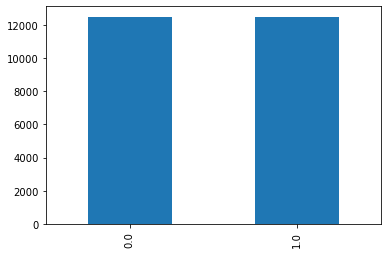

In [16]:
print(y_df['label'].value_counts())
y_df['label'].value_counts().plot.bar()
plt.show()

### Train test split

In [34]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
xgb_clf = xgb.XGBClassifier(se_label_encoder=False)
xgb_clf.fit(x_train,y_train.ravel())


In [18]:
#params = {"n_estimators":range(1,20,2),"criterion":['gini','entropy']}

#grid_search = GridSearchCV(estimator=RandomForestClassifier(),param_grid=params,cv=5 )
#grid_search.fit(x_train,y_train.ravel())
#print(grid_search.best_estimator_)

### Dummy classifire

In [19]:
dumm = dummy.DummyClassifier()
dumm.fit(x_train,y_train)
print(metrics.accuracy_score(y_true=y_test,y_pred = dumm.predict(x_test)))
print("dummy classifire accuracy is 49.9%")

0.4997333333333333
dummy classifire accuracy is 49.9%


### Prediction using ensemble learning

In [20]:
#RandomForest
rnd_clf = RandomForestClassifier(n_estimators=100, max_depth=1, n_jobs=1)
rnd_clf.fit(x_train,y_train.ravel())
rnd_pred = rnd_clf.predict(x_test)

In [21]:
print("accuracy score: ",metrics.accuracy_score(y_true=y_test,y_pred=rnd_pred))

accuracy score:  0.5948


In [22]:
cro_vall = cross_val_score(rnd_clf, X, y.ravel(), cv=5)
print("cross validation mean score: ",cro_vall.mean())

cross validation mean score:  0.5854799999999999


In [23]:
##AdaBoost
#ada_clf = AdaBoostClassifier(DecisionTreeClassifier(random_state=42))
#ada_clf.fit(x_train,y_train.ravel())
#ada_pred = ada_clf.predict(x_test)

In [24]:
#print("accuracy score: ", metrics.accuracy_score(y_true=y_test,y_pred=ada_pred))

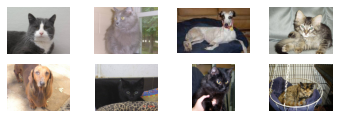

In [25]:
for i in range(8):
    img = random.choice([x for x in images])
    fig = plt.subplot(4,4,i+1)
    fig.axis('off')
    img = mpimg.imread(os.path.join(r'C:\Users\meirk\Desktop\train\train/', img)) 
    fig.imshow(img) 

In [26]:
rnd_clf.fit(x_train,y_train.ravel())
rnd_pred = rnd_clf.predict(x_test)
print("accuracy score: ",metrics.accuracy_score(y_true=y_test,y_pred=rnd_pred))

accuracy score:  0.5872
